In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename="lms_fun_v3.hdf5"
lms_data = h5py.File(filename, 'r')
lms_data.keys()

<KeysViewHDF5 ['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']>

#### Part (a) LMS averaged over 600 runs

##### Defining a function to perform LMS for 600 sequences and plotting the weight coefficients as well as Learning curves

In [31]:
def LMS_avg_run(v,z,eta,sequences,length, t):
    W_total=np.empty((sequences,length+1,t))
    MSE_est=np.empty((sequences,length))
    for i in range(sequences):
        w_matrix=np.zeros((t,1))
        mse=np.array([])
        W=np.array(w_matrix.reshape(1,3))
        for j in range(length):
            w_matrix+=eta*(((z[i,j]-(np.matmul(w_matrix.T,v[i,j].reshape(t,1))))*(v[i,j]).reshape(t,1)))
            W=np.append(W,w_matrix.reshape(1,3),axis=0)
            mse=np.append(mse,np.square(z[i,j]-(np.matmul(w_matrix.T,v[i,j]))))
        W_total[i]=W
        MSE_est[i]=mse
    weights=np.mean(W_total,axis=0)
    MSE_final=np.mean(MSE_est,axis=0)
    plt.figure(figsize=(10,8))
    plt.plot(MSE_final)
    plt.title("Learning Curve")
    plt.xlabel("Updates")
    plt.ylabel("MSE")
    plt.show()
    plt.figure(figsize=(10,8))
    for k in range(t):
        plt.title("Coefficients averaged")
        plt.xlabel("Updates")
        plt.ylabel("weight estimates")
        plt.plot(weights[:,k])
    plt.show()
    return np.mean(MSE_final)

#### For SNR 10 db

In [5]:
v_10db=np.array(lms_data['matched_10_v'])
z_10db=np.array(lms_data['matched_10_z'])

#### For Learning rate of 0.05

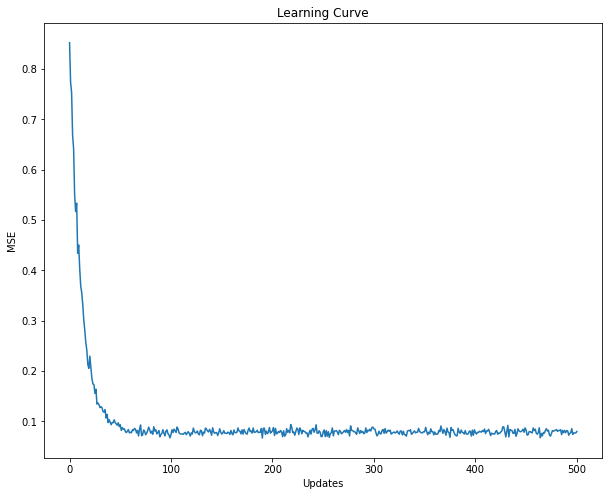

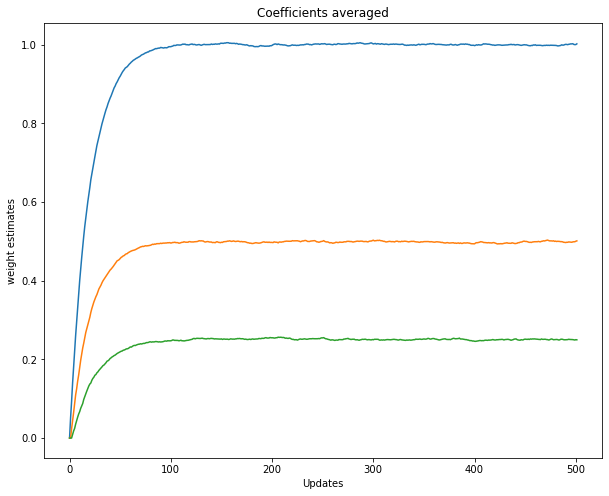

In [32]:
mse_10_1=LMS_avg_run(v_10db,z_10db,0.05,600,501,3)

#### For Learning rate 0.15

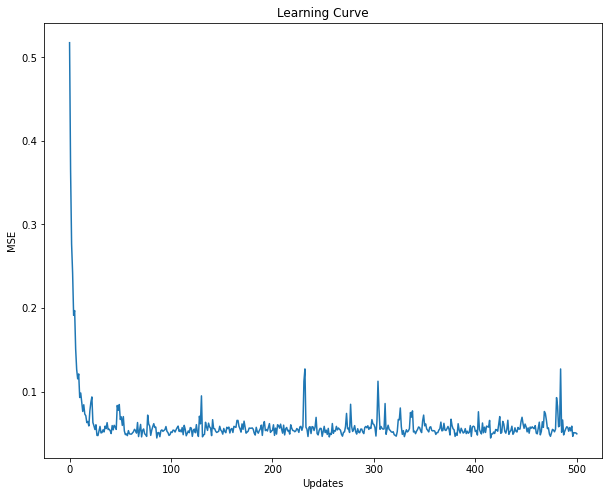

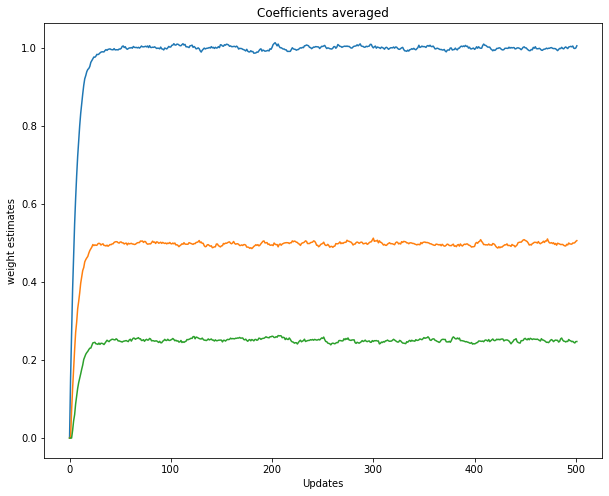

In [33]:
mse_10_2=LMS_avg_run(v_10db,z_10db,0.15,600,501,3)

#### Eta for which it diverges

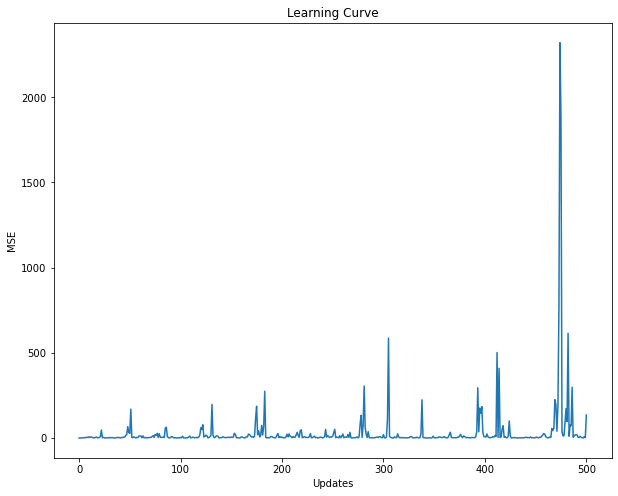

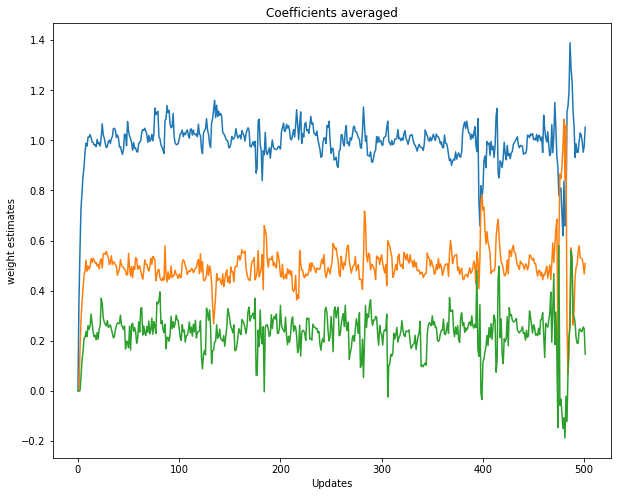

In [35]:
mse_10_3=LMS_avg_run(v_10db,z_10db,0.35,600,501,3)

#### As we can see, Eta for which it diverges is 0.35 for SNR 10db

#### For SNR 3db

In [9]:
v_3db=np.array(lms_data['matched_3_v'])
z_3db=np.array(lms_data['matched_3_z'])


#### For learning rate 0.05

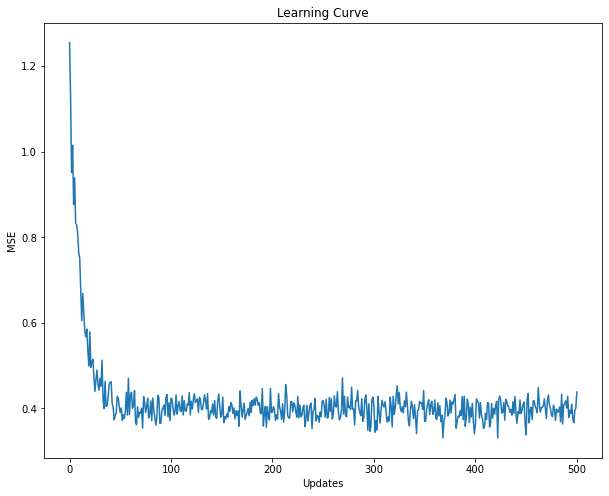

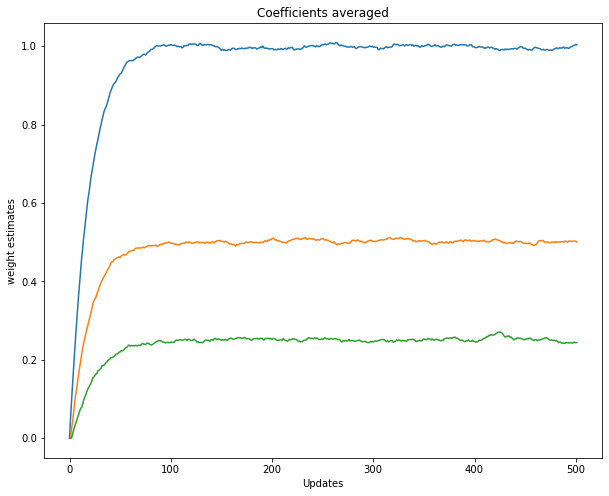

In [36]:
mse_3_1=LMS_avg_run(v_3db,z_3db,0.05,600,501,3)

#### For learning rate 0.15

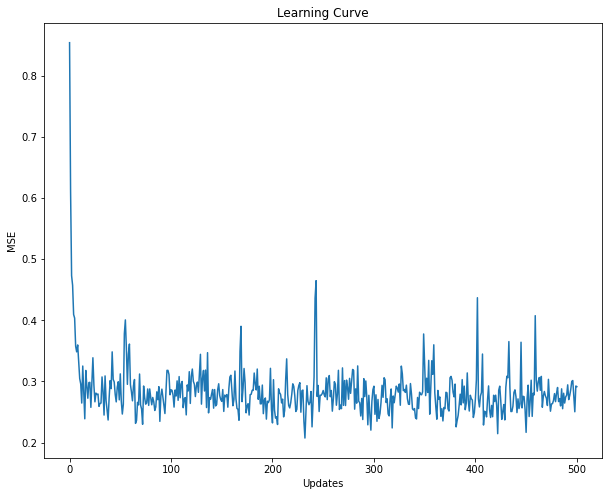

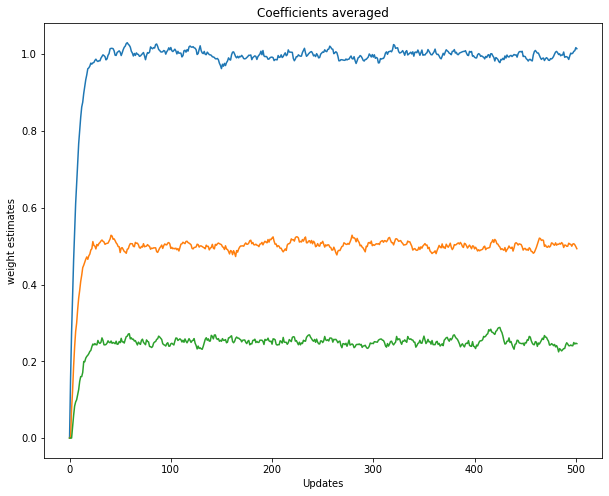

In [37]:
mse_3_2=LMS_avg_run(v_3db,z_3db,0.15,600,501,3)

#### Eta for which it diverges

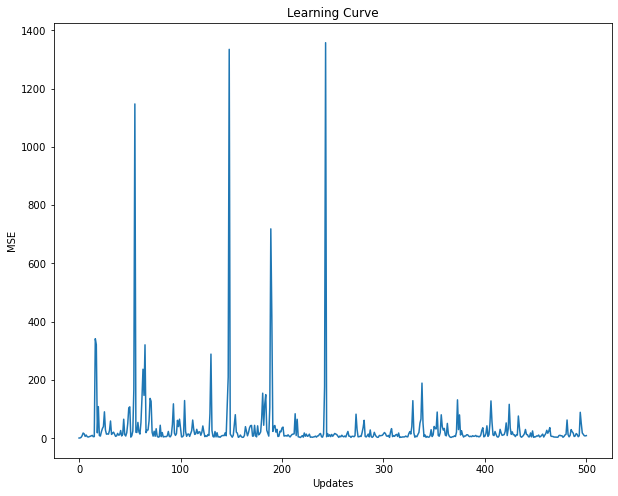

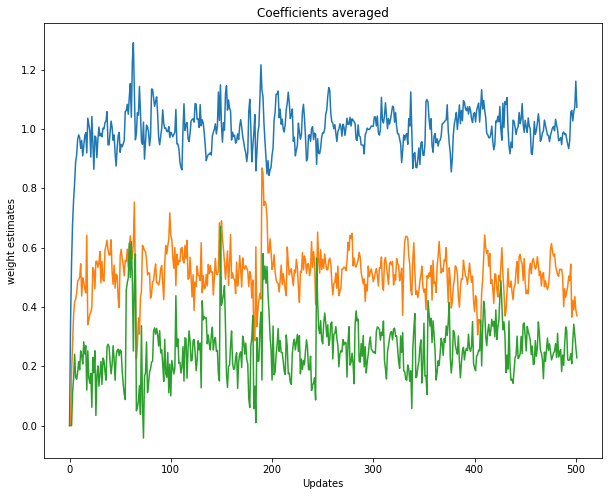

In [38]:
mse_3_3=LMS_avg_run(v_3db,z_3db,0.34,600,501,3)

#### Eta for which it diverges is for 0.34 for SNR 3db

####  part (b)- For single realization

#### Defining function which performs LMS for single realization of input

In [12]:
def LMS_algo_single(v,z,eta,length, t):
    w_matrix=np.zeros((t,1))
    Weights=np.array(w_matrix.reshape(1,3))
    for i in range(length):
        w_matrix_new=w_matrix+eta*(((z[i]-(np.matmul(w_matrix.T,v[i].reshape(t,1))))*v[i].reshape(t,1)))
        Weights=np.append(Weights,w_matrix_new.reshape(1,3),axis=0)
        w_matrix=w_matrix_new
    plt.plot(Weights[:,0])
    plt.plot(Weights[:,1])
    plt.plot(Weights[:,2])
    plt.title("Weight estimates for single realization")
    plt.show()
    return Weights

In [13]:
v_timevarying=np.array(lms_data['timevarying_v'])
z_timevarying=np.array(lms_data['timevarying_z'])

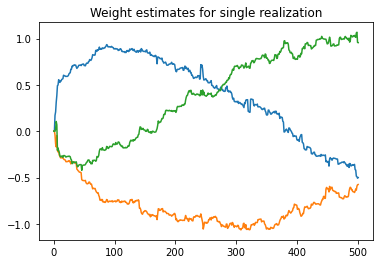

In [14]:
Weights_partb=LMS_algo_single(v_timevarying,z_timevarying,0.05,501,3)

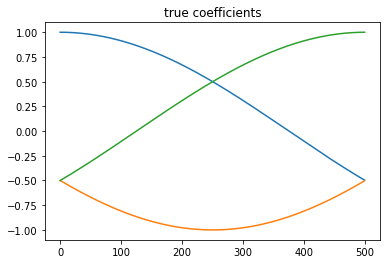

In [15]:
plt.title("true coefficients")
plt.plot(np.array(lms_data['timevarying_coefficents']))
plt.show()

#### Plotting coefficient estimates versus true coefficients in a single plot

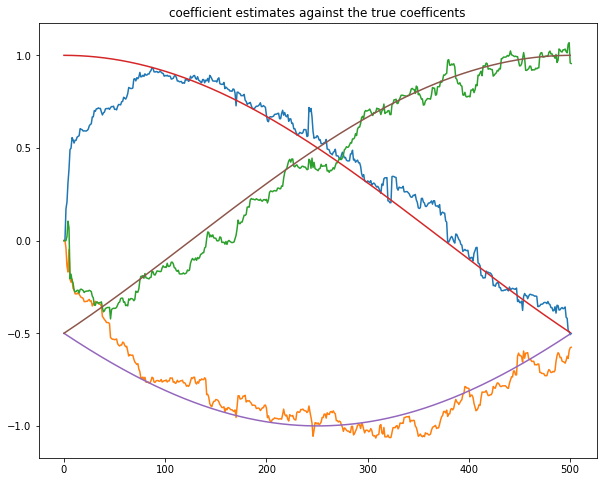

In [16]:
plt.figure(figsize=(10,8))
plt.title("coefficient estimates against the true coefficents")
plt.plot(Weights_partb)
plt.plot(np.array(lms_data['timevarying_coefficents']))
plt.show()

#### Part (c) Data from Non linear process

In [17]:
def LMS_mismatched(v,y,N):
    Weight_value=[]
    MSE=[]
    for i in range(N):
        w=np.matmul(np.linalg.inv((np.matmul(v[i].T,v[i])/len(v[i]))),np.matmul(v[i].T,y[i]/len(v[i])))
        mse=np.square(y[i]-np.matmul(w,v[i].T))
        Weight_value.append(w)
        MSE.append(mse)
    return np.mean(np.array(Weight_value),axis=0), np.mean(MSE)


In [18]:
mismatch_v=np.array(lms_data['mismatched_v'])
mismatch_y=np.array(lms_data['mismatched_y'])

In [19]:
Weight_value,MSE=LMS_mismatched(mismatch_v,mismatch_y,600)
print(Weight_value)
print("LLSE computed with entire set is {0}".format(MSE))

[0.40137734 0.38940093 0.37127277]
LLSE computed with entire set is 0.32917670079614436


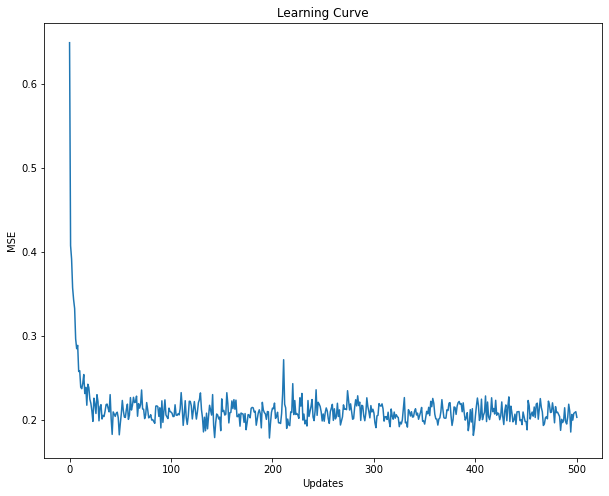

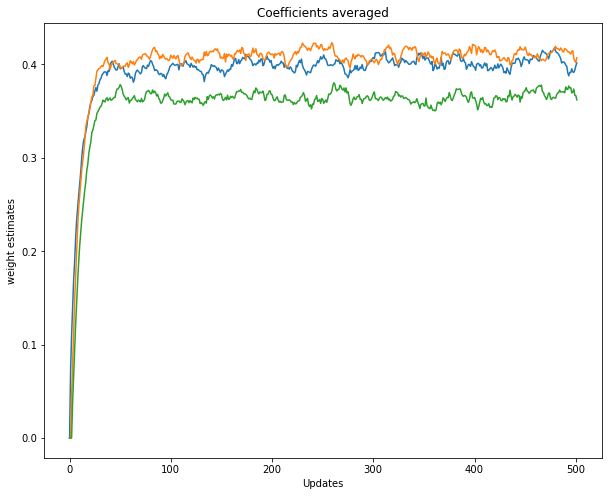

MSE for LMS learning for eta 0.1 is 0.2121023311089944


In [54]:
mse_c_1=LMS_avg_run(mismatch_v,mismatch_y,0.1,600,501,3)
print("MSE for LMS learning for eta 0.1 is {0}".format(mse_c_1))

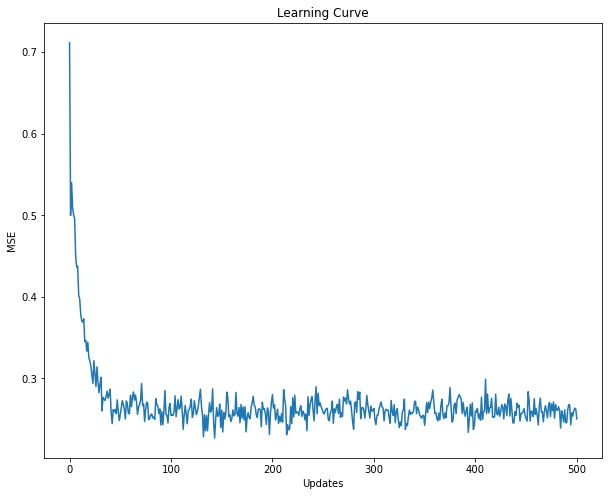

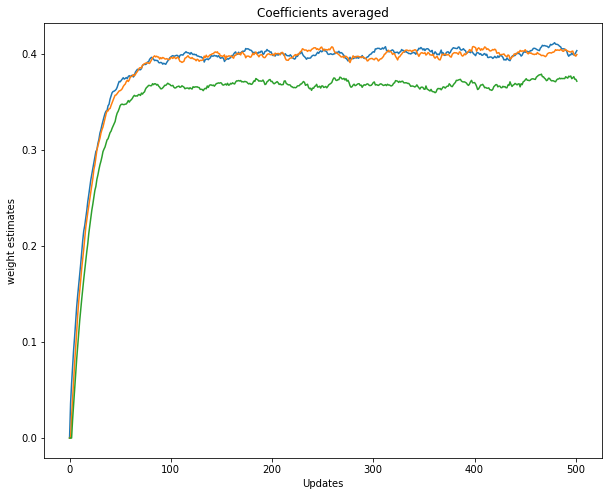

MSE for LMS learning for eta 0.05 is 0.26836317866379966


In [58]:
mse_c_2=LMS_avg_run(mismatch_v,mismatch_y,0.05,600,501,3)
print("MSE for LMS learning for eta 0.05 is {0}".format(mse_c_2))

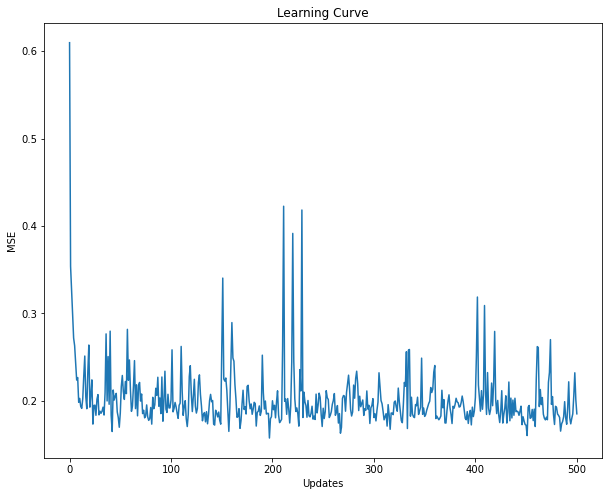

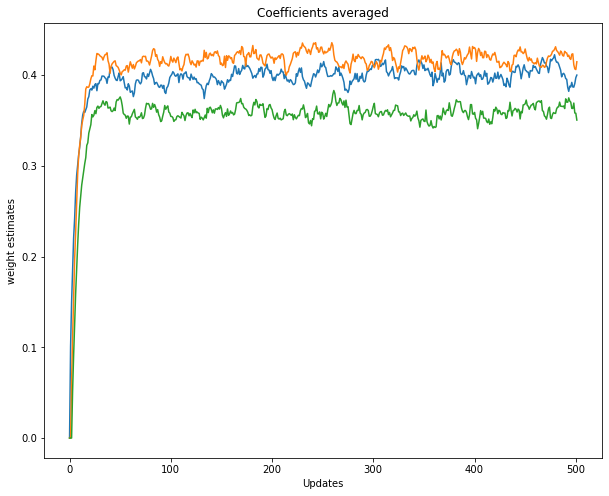

MSE for LMS learning for eta 0.18 is 0.20182230947551058


In [63]:
mse_c_3=LMS_avg_run(mismatch_v,mismatch_y,0.14,600,501,3)
print("MSE for LMS learning for eta 0.18 is {0}".format(mse_c_3))

#### As we can see, with correct learning rate, the LLSE computed using LMS learning curve after convergence is lower than LMS entire set.